In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# File to Load 
load_data = "StocksAndSentiment_basic.csv"

# Read from CSV
load_df = pd.read_csv(load_data)

load_df

,Unnamed: 0,Symbol,Year,Month,Day,Open,High,Low,Close,Volume,Date,Good_time_to_Buy,Uncertain,Bad_time_to_Buy,Relative
0,0,TM,2005,2,25,71.640,72.224,71.556,72.104,249469,2005-02-28,67.0,10.0,23.0,144.0
1,1,TM,2005,2,28,72.475,72.643,71.964,72.271,166169,2005-02-28,67.0,10.0,23.0,144.0
2,2,TTM,2005,2,25,10.270,10.318,10.156,10.175,167534,2005-02-28,67.0,10.0,23.0,144.0
3,3,TTM,2005,2,28,10.318,10.414,10.127,10.347,386313,2005-02-28,67.0,10.0,23.0,144.0
4,4,HMC,2005,2,25,25.346,25.576,25.346,25.566,115828,2005-02-28,67.0,10.0,23.0,144.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21930,21930,F,2005,1,25,10.300,10.575,10.300,10.426,14696545,2005-01-31,69.0,9.0,22.0,147.0
21931,21931,F,2005,1,26,10.463,10.528,10.377,10.522,8827671,2005-01-31,69.0,9.0,22.0,147.0
21932,21932,F,2005,1,27,10.449,10.488,10.377,10.395,7987342,2005-01-31,69.0,9.0,22.0,147.0
21933,21933,F,2005,1,28,10.362,10.443,10.275,10.354,11752334,2005-01-31,69.0,9.0,22.0,147.0


In [2]:
preprocess_df = load_df.loc[(load_df['Year'] == 2015) | (load_df['Year'] == 2016)]
preprocess_df

,Unnamed: 0,Symbol,Year,Month,Day,Open,High,Low,Close,Volume,Date,Good_time_to_Buy,Uncertain,Bad_time_to_Buy,Relative
10971,10971,TM,2015,1,2,119.620,120.010,118.340,119.080,263779,2015-01-31,74.0,3.0,23.0,151.0
10972,10972,TM,2015,1,5,117.930,118.090,116.600,116.910,253842,2015-01-31,74.0,3.0,23.0,151.0
10973,10973,TM,2015,1,6,116.940,117.250,114.870,115.710,301389,2015-01-31,74.0,3.0,23.0,151.0
10974,10974,TM,2015,1,7,118.940,119.470,118.510,118.620,407050,2015-01-31,74.0,3.0,23.0,151.0
10975,10975,TM,2015,1,8,119.820,121.020,119.820,120.900,526309,2015-01-31,74.0,3.0,23.0,151.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13788,13788,RACE,2016,12,23,57.877,57.946,57.590,57.768,342461,2016-12-31,65.0,7.0,28.0,137.0
13789,13789,RACE,2016,12,27,57.847,57.976,57.619,57.728,131968,2016-12-31,65.0,7.0,28.0,137.0
13790,13790,RACE,2016,12,28,57.590,57.709,57.134,57.194,175311,2016-12-31,65.0,7.0,28.0,137.0
13791,13791,RACE,2016,12,29,57.600,57.728,57.075,57.233,192467,2016-12-31,65.0,7.0,28.0,137.0


In [3]:
#preprocess_df.isna().sum()

In [4]:
preprocess_df = preprocess_df.drop(['Unnamed: 0', 'Date', 'High', 'Low', 'Good_time_to_Buy', 'Bad_time_to_Buy','Uncertain' ], axis=1)
preprocess_df = preprocess_df.reset_index()
preprocess_df = preprocess_df.drop(['index'], axis=1)
preprocess_df

,Symbol,Year,Month,Day,Open,Close,Volume,Relative
0,TM,2015,1,2,119.620,119.080,263779,151.0
1,TM,2015,1,5,117.930,116.910,253842,151.0
2,TM,2015,1,6,116.940,115.710,301389,151.0
3,TM,2015,1,7,118.940,118.620,407050,151.0
4,TM,2015,1,8,119.820,120.900,526309,151.0
...,...,...,...,...,...,...,...,...
2817,RACE,2016,12,23,57.877,57.768,342461,137.0
2818,RACE,2016,12,27,57.847,57.728,131968,137.0
2819,RACE,2016,12,28,57.590,57.194,175311,137.0
2820,RACE,2016,12,29,57.600,57.233,192467,137.0


In [5]:
data_binary_encoded = pd.get_dummies(preprocess_df)
data_binary_encoded = data_binary_encoded.dropna()
data_binary_encoded

,Year,Month,Day,Open,Close,Volume,Relative,Symbol_F,Symbol_GM,Symbol_HMC,Symbol_RACE,Symbol_TM,Symbol_TTM
0,2015,1,2,119.620,119.080,263779,151.0,0,0,0,0,1,0
1,2015,1,5,117.930,116.910,253842,151.0,0,0,0,0,1,0
2,2015,1,6,116.940,115.710,301389,151.0,0,0,0,0,1,0
3,2015,1,7,118.940,118.620,407050,151.0,0,0,0,0,1,0
4,2015,1,8,119.820,120.900,526309,151.0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2817,2016,12,23,57.877,57.768,342461,137.0,0,0,0,1,0,0
2818,2016,12,27,57.847,57.728,131968,137.0,0,0,0,1,0,0
2819,2016,12,28,57.590,57.194,175311,137.0,0,0,0,1,0,0
2820,2016,12,29,57.600,57.233,192467,137.0,0,0,0,1,0,0


USING https://www.tensorflow.org/tutorials/keras/regression as guide

In [6]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2.1.0


In [7]:
xdata = data_binary_encoded.drop(['Relative'],axis=1).values
ydata = data_binary_encoded.pop('Relative').values

X = xdata
y = ydata

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [9]:
normalizer = preprocessing.Normalization()

In [10]:
normalizer.adapt(np.array(X_train))

In [11]:
print(normalizer.mean.numpy())

[2.0155354e+03 6.6063328e+00 1.5816635e+01 4.4889248e+01 4.4859608e+01
 9.8828790e+06 1.8147448e-01 1.8100189e-01 1.7107750e-01 1.1058601e-01
 1.7816634e-01 1.7769375e-01]


In [12]:
first = np.array(X_train[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[  2015.        5.       28.       33.67     33.93 634099.        0.
       0.        1.        0.        0.        0.  ]]

Normalized: [[-1.07 -0.46  1.41 -0.32 -0.31 -0.6  -0.47 -0.47  2.2  -0.35 -0.47 -0.46]]


In [13]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001),
              metrics=[tf.keras.metrics.MeanAbsolutePercentageError()])
  return model

In [14]:
dnn_model = build_and_compile_model(normalizer)

In [15]:
%%time
history = dnn_model.fit(
    X_train, y_train,
    validation_split=0.2,
    verbose=0, epochs=1500)

Wall time: 1min 51s


In [16]:
#dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization multiple                  25        
_________________________________________________________________
dense (Dense)                multiple                  832       
_________________________________________________________________
dense_1 (Dense)              multiple                  4160      
_________________________________________________________________
dense_2 (Dense)              multiple                  65        
Total params: 5,082
Trainable params: 5,057
Non-trainable params: 25
_________________________________________________________________


In [17]:
test_results = dnn_model.evaluate(X_test, y_test, verbose=2)
test_results

706/706 - 0s - loss: 1.1629 - mean_absolute_percentage_error: 0.8104


[1.1628675163636464, 0.8103925]

In [18]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Relative]')
  plt.legend()
  plt.grid(True)

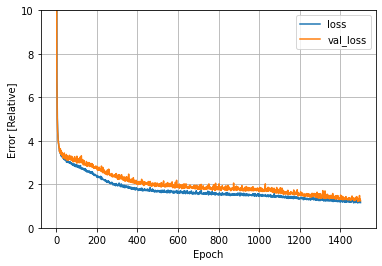

In [19]:
plot_loss(history)

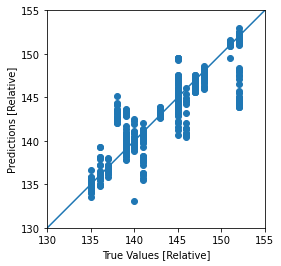

In [20]:
test_predictions = dnn_model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [Relative]')
plt.ylabel('Predictions [Relative]')
lims = [130, 155]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


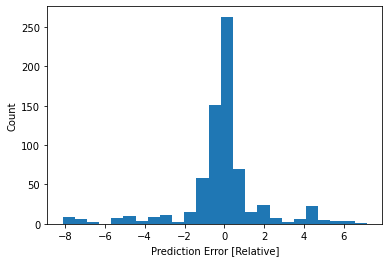

In [21]:
error = test_predictions - y_test
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [Relative]')
_ = plt.ylabel('Count')

# Accuracy Scoring

In [22]:
a = tf.math.confusion_matrix(
    y_test, test_predictions, num_classes=None, weights=None, dtype=tf.dtypes.int32,
    name=None
)

In [23]:
print(a)

tf.Tensor(
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  3 17  0]
 [ 0  0  0 ...  1 15 17]], shape=(153, 153), dtype=int32)


# Exporting Model

In [24]:
dnn_model.save('saved_model/my_model.h5')

In [25]:
new_model = tf.keras.models.load_model('saved_model/my_model.h5')

# Show the model architecture
new_model.summary()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\mrjac\Anaconda3\envs\PythonAdv\lib\site-packages\IPython\core\interactiveshell.py", line 2878, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-25-ee37a19575af>", line 1, in <module>
    new_model = tf.keras.models.load_model('saved_model/my_model.h5')
  File "C:\Users\mrjac\Anaconda3\envs\PythonAdv\lib\site-packages\tensorflow_core\python\keras\saving\save.py", line 146, in load_model
    return hdf5_format.load_model_from_hdf5(filepath, custom_objects, compile)
  File "C:\Users\mrjac\Anaconda3\envs\PythonAdv\lib\site-packages\tensorflow_core\python\keras\saving\hdf5_format.py", line 168, in load_model_from_hdf5
    custom_objects=custom_objects)
  File "C:\Users\mrjac\Anaconda3\envs\PythonAdv\lib\site-packages\tensorflow_core\python\keras\saving\model_config.py", line 55, in model_from_config
    return deserialize(config, custom_objects=custom_objects)
  File "C:\Users\mrjac\Anaconda3\envs\Py

ValueError: Unknown layer: Normalization